<a href="https://colab.research.google.com/github/oganiler/google_colab/blob/main/TF2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2026-02-06 22:20:05--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2026-02-06 22:20:06 (13.5 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data_numpy = pd.read_csv('moore.csv', header=None).to_numpy()

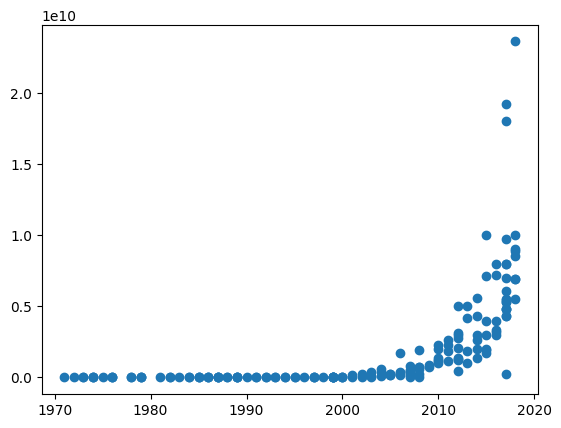

In [ ]:
X = data_numpy[:, 0].reshape(-1, 1) #making an N x D matrix
Y = data_numpy[:, 1].reshape(-1, 1)
plt.scatter(X, Y)

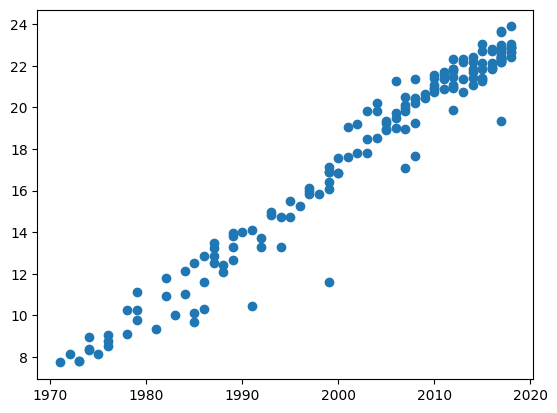

In [ ]:
#since the data distribution is exponential, let's linearize it
log_Y = np.log(Y)
plt.scatter(X, log_Y)

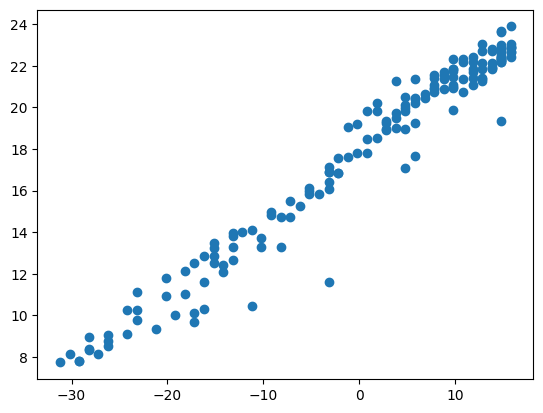

In [ ]:
#normalize the x by zero mean - we could have applied the normal distribution
normalized_X = X - np.mean(X)
plt.scatter(normalized_X, log_Y)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),# D = 1
    tf.keras.layers.Dense(1), # 1 Output
])

In [ ]:
#let's use a custom optimizer other than "adam" (since we did not scale the data)
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse') #learning_rate = 0.01 momentum = 0.9 another form of Gradient Ascent

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  else:
    return 0.001


In [ ]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule, verbose=1)

In [ ]:
#let's train the model
r = model.fit(normalized_X, log_Y, epochs=200, callbacks=[scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 474382000490666269711601238016.0000 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 518691776304772835965902258176.0000 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 577798010793393341218210971648.0000 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 382604507948028548055696408576.0000 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 287645387100688163112096890880.0000 - learning_rate: 0.0010

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/200
6/6 ━━━━━━━━━━━━

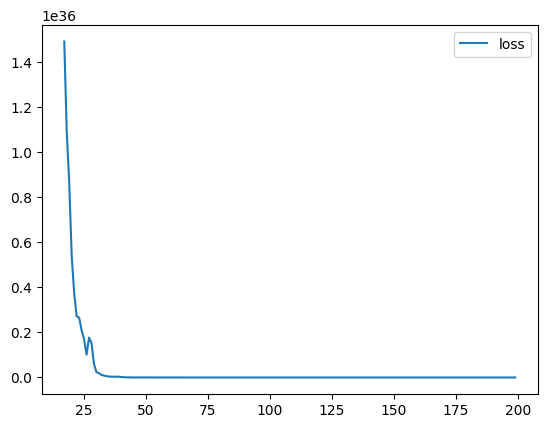

In [ ]:
#plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [ ]:
model.layers
model.layers[0].get_weights()

[array([[0.3416825]], dtype=float32), array([17.76494], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0, 0]
a

np.float32(0.3416825)

In [ ]:
print("Time to double:", np.log(2)/a)

Time to double: 1.9908805949018473


In [ ]:
#let's proove with Newton Least Squares
#scale the x this time
X_new = normalized_X.flatten()
denominator = X_new.dot(X_new) - X_new.mean() * X_new.sum()
a_new = (X_new.dot(log_Y) - log_Y.mean() * X_new.sum()) / denominator
b_new = (log_Y.mean() * X_new.dot(X_new) - X_new.mean() * X_new.dot(log_Y)) / denominator
print(a_new, b_new)
print("Time to double:", np.log(2)/a_new)

[0.34168249] [17.76493939]
Time to double: [2.02862952]


In [ ]:
x = normalized_X.reshape(-1, 1).astype(np.float32)
y = log_Y.reshape(-1, 1).astype(np.float32)

# Design matrix: [x, 1]
A = np.hstack([x, np.ones_like(x)])

# Least squares solution: minimizes ||A theta - y||^2
theta, *_ = np.linalg.lstsq(A, y, rcond=None)
w = float(theta[0])
b = float(theta[1])

# Set weights of Dense(1): kernel shape (1,1), bias shape (1,)
model.set_weights([np.array([[w]], dtype=np.float32),
                   np.array([b], dtype=np.float32)])

print("w,b =", w, b)

w,b = 0.341682493686676 17.76494026184082


/tmp/ipython-input-4289165300.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w = float(theta[0])
/tmp/ipython-input-4289165300.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(theta[1])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


True

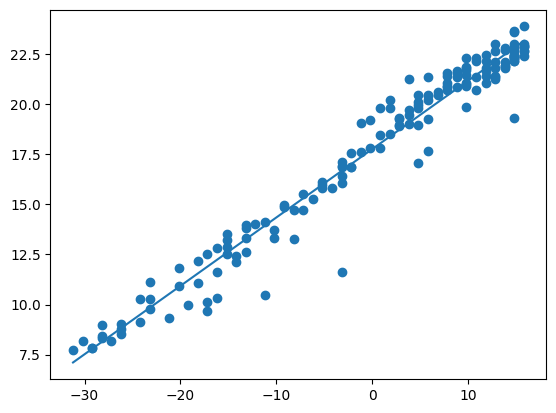

In [ ]:
#make sure the line fits our data
Yhat = model.predict(normalized_X).flatten()
plt.scatter(normalized_X, log_Y)
plt.plot(normalized_X, Yhat)

#get the weigts
w,b = model.layers[0].get_weights()

#Reshape X because we flattened it again
normalized_X = normalized_X.reshape(-1,1)

# (N x 1) x (1 x 1) + (1) ---> (N x 1)
Yhat2 = (normalized_X.dot(w) + b).flatten()

#Manually evaluate
np.allclose(Yhat, Yhat2)